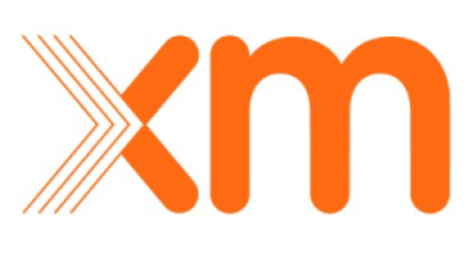

Caso de ejemplo desarrollado por el equipo de analitica de XM. 

# Objetivos de este Notebook

Si se desea conocer el proceso de instalación y consulta de variables disponibles se puede consultar a través Jupyter Notebook **Nombre del ejemplo** que se encuentra disponible en el repositorio de GitHub.  

* Explicar cómo se pueden tratar datos para los análisis 
* Explicar cómo se pueden construir gráficas con los datos


**Índice**

1. [Importación de librerías](#section1)

2. [Cálculo de la demanda mensual por región](#section2)

3. [Grafica demanda mensual](#section3)

4. [Cálculo de máximo, mínimo y promedio del precio de bolsa nacional](#section4)

5. [Grafica precio de bolsa nacional](#section5)

<a id='section1'></a>
# Importación de librerías

In [1]:
from pydataxm import *          # Importa la libreria que fue instalada con pip install pydataxm o tambien desde GitHub
import datetime as dt           # Permite trabajar con fechas 
import pandas as pd             # Manipulacion de datos
import matplotlib.pyplot as plt # Construcción de gráficas

La versión de la libreria pydataxm que se esta usando es 0.3.0 en abril del 2022

In [2]:
objetoAPI = pydataxm.ReadDB()     # Construir la clase que contiene los métodos de pydataxm

In [3]:
objetoAPI.get_collections('DemaCome') # Revisar los cruces disponibles para demanda comercial

,MetricId,MetricName,Entity,MaxDays,Type,Url,Filter,MetricUnits,MetricDescription
3,DemaCome,Demanda Comercial,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Considera la demanda propia de cada comerciali...
11,DemaCome,Demanda Comercial,Agente,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Comercializador,kWh,Considera la demanda propia de cada comerciali...
79,DemaCome,Demanda Comercial,MercadoComercializacion,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Considera la demanda propia de cada comerciali...


In [4]:
df_demanda = objetoAPI.request_data('DemaCome',
                                    'MercadoComercializacion',
                                    dt.date(2021, 1, 1),
                                    dt.date(2021, 1, 31))

In [5]:
df_demanda.head() #Ver encabezado

,Id,Values_code,Values_MarketType,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,MercadoComercializacion,ANTIOQUIA,NO REGULADO,187267.74,184439.41,181964.23,180449.83,179828.44,183384.33,148015.81,...,166434.03,166166.14,164032.90,200853.23,199419.06,199949.43,199837.81,199101.29,203837.00,2021-01-01
1,MercadoComercializacion,ANTIOQUIA,REGULADO,638791.66,596695.26,556691.65,534628.22,523192.36,521990.75,519059.38,...,713607.34,701042.48,700844.47,783603.17,808329.58,769691.02,713592.30,649919.59,587169.72,2021-01-01
2,MercadoComercializacion,ARAUCA,NO REGULADO,44084.29,44234.13,44431.94,44517.76,44602.00,44630.99,44198.19,...,44299.09,44333.01,44354.32,44617.25,45075.03,45245.93,45043.16,44869.58,44685.64,2021-01-01
3,MercadoComercializacion,ARAUCA,REGULADO,31268.63,30745.03,30218.23,29952.89,29531.91,29297.27,27745.51,...,29241.20,29177.43,29916.50,35321.03,37007.63,37264.47,36355.23,35140.17,33720.31,2021-01-01
4,MercadoComercializacion,BAJO PUTUMAYO,NO REGULADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.52,NaN,NaN,NaN,2021-01-01


<a id='section2'></a>
# Cálculo de la demanda mensual por región 

Debido a que la demanda consultada esta con una granularidad horaria, a continuación se realiza el cálculo de la demanda agrupado de forma diaria, luego de forma mensual; y por último se realiza el calculo en porcentaje de la demanda por región. 

In [6]:
df_demanda['demanda_diaria'] = df_demanda.sum(axis=1, skipna=True, numeric_only=True) #Cálculo diario de la demanda
df_demanda = df_demanda.groupby(by=['Values_code']).sum()['demanda_diaria']           #Cálculo mensual de la demanda
df_demanda_porcenaje = (df_demanda*100/df_demanda.sum()).round(2).sort_values(ascending=True) #cálculo del porcentaje de la demanda 

In [7]:
df_demanda_porcenaje.head()

Values_code
POPAYAN - PURACE      0.01
VALLE DEL SIBUNDOY    0.02
RUITOQUE              0.03
GUAVIARE              0.10
BAJO PUTUMAYO         0.10
Name: demanda_diaria, dtype: float64

<a id='section3'></a>
# Grafica demanda mensual

Veamos mediante una visualización el porcentaje de la demanda de cada región. 

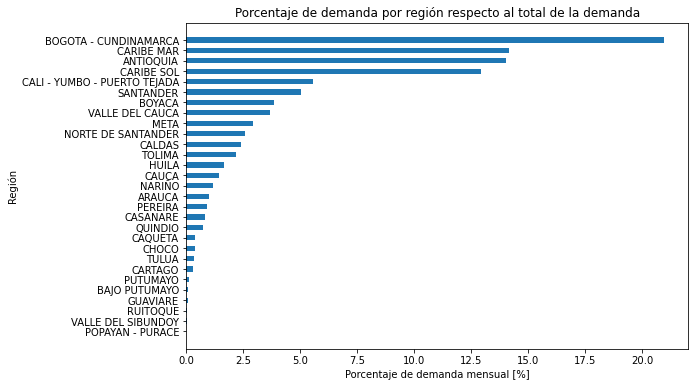

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(9,6))
ax.barh(y=df_demanda_porcenaje.axes[0].tolist(), width=df_demanda_porcenaje.values.tolist(), height=0.5)
ax.set_ylabel('Región')
ax.set_xlabel('Porcentaje de demanda mensual [%]')
plt.xticks(rotation = 0);
plt.title('Porcentaje de demanda por región respecto al total de la demanda')
plt.show()

<a id='section4'></a>
# Cálculo de máximo, mínimo y promedio del precio de bolsa nacional 

Veamos otro ejemplo calculando el máximo, mínimo y promedio diario del precio en bolsa nacional de forma diaria durante el 2021.

In [9]:
    df_precio_bolsa = objetoAPI.request_data("PrecBolsNaci", "Sistema", dt.date(2021, 1, 1), dt.date(2021, 12, 31)) #consulta de la variable precio de bolsa nacional por sistema  
    df_precio_bolsa.drop(columns=['Id', 'Values_code'], inplace=True)             #Eliminación de columnas innecesarias para los cálculos requeridos
    df_precio_bolsa.set_index('Date', inplace=True)                               #Uso de la columna de 'Date' como índice
    df_resumen_anual = df_precio_bolsa.aggregate(['mean', 'max', 'min'], axis=1)  #Cálculo del promedio, máximo y mínimo del precio de bolsa nacional

In [10]:
df_resumen_anual.head()

,mean,max,min
2021-01-01,152.351667,199.31,128.31
2021-01-02,130.054583,188.96,85.27
2021-01-03,137.785000,199.16,100.16
2021-01-04,153.240000,198.46,126.46
2021-01-05,171.200000,228.45,146.45


<a id='section5'></a>
# Grafica precio de bolsa nacional

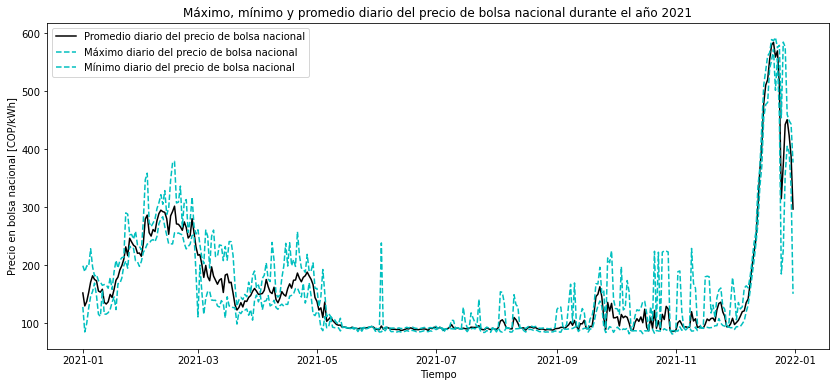

In [16]:
    fig, ax = plt.subplots(1, 1, figsize=(14,6))
    ax.plot(df_resumen_anual.index, df_resumen_anual['mean'], "k",  label='Promedio diario del precio de bolsa nacional')
    ax.plot(df_resumen_anual.index, df_resumen_anual['max'], "c--", label='Máximo diario del precio de bolsa nacional')
    ax.plot(df_resumen_anual.index, df_resumen_anual['min'], "c--", label='Mínimo diario del precio de bolsa nacional')
    ax.set_ylabel('Precio en bolsa nacional [COP/kWh]')
    ax.set_xlabel('Tiempo')
    plt.title('Máximo, mínimo y promedio diario del precio de bolsa nacional durante el año 2021')
    ax.legend()
    plt.show()